<a href="https://colab.research.google.com/github/yaswanth-142004/Artificial_Intelligence_in_marketing_project/blob/main/Aim_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [35]:
path = '/content/ar.csv'
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, zero_one_loss
from scipy.sparse import hstack

# Read data from CSV file
data = pd.read_csv(path, encoding='latin1')

# Extract features and target variable
X = data.drop(columns=["Recommended"])
y = data["Recommended"]

# Handle categorical variables
categorical_columns = ["Title", "Airline", "Type of Traveller", "Route", "Class", "Recommended"]
categorical_data = data[categorical_columns]

# Encode categorical columns
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(categorical_data)

# Convert 'Month Flown' to datetime with explicit format and errors='coerce'
data['Month Flown'] = pd.to_datetime(data['Month Flown'], format='%b-%y', errors='coerce')

# Drop rows with out-of-range values
data = data.dropna(subset=['Month Flown'])

# Extract numerical features
numerical_columns = ["Seat Comfort", "Staff Service", "Food & Beverages",
                     "Inflight Entertainment", "Value For Money", "Overall Rating"]
X_numeric = data[numerical_columns]


# Perform TF-IDF transformation for text data
text_data = data["Reviews"]
tfidf_vectorizer = TfidfVectorizer()
text_tfidf = tfidf_vectorizer.fit_transform(text_data)

# Stack the sparse matrices
X_combined_sparse = hstack((X_numeric, categorical_encoded, text_tfidf))

# Split the combined sparse data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_sparse, y, test_size=0.3, random_state=42)

# Initialize SVM classifier
clf = SVC(kernel='rbf', C=1.0)

# Train the SVM model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Encode both true labels and predicted labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Evaluate the model
accuracy_SVM = accuracy_score(y_test_encoded, y_pred_encoded)
precision_SVM = precision_score(y_test_encoded, y_pred_encoded, average='binary', pos_label=1)
recall_SVM = recall_score(y_test_encoded, y_pred_encoded, average='binary', pos_label=1)
f1_SVM = f1_score(y_test_encoded, y_pred_encoded, average='binary', pos_label=1)
misclassification_rate_SVM = 1 - accuracy_SVM
zero_one_loss_value_SVM = zero_one_loss(y_test_encoded, y_pred_encoded)

# Calculate MAE
mae_SVM = mean_absolute_error(y_test_encoded, y_pred_encoded)

print("For SVM     ")
print("Accuracy:", accuracy_SVM)
print("Precision:", precision_SVM)
print("Recall:", recall_SVM)
print("F1 Score:", f1_SVM)
print("Misclassification Rate:", misclassification_rate_SVM)
print("Zero-One Loss:", zero_one_loss_value_SVM)
print("Mean Absolute Error:", mae_SVM)
print("    ******  ")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Misclassification Rate: 0.0
Zero-One Loss: 0.0
Mean Absolute Error: 0.0


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Misclassification Rate: 0.0
Zero-One Loss: 0.0


In [30]:
path = '/content/ar.csv'
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, zero_one_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Read data from CSV file
data = pd.read_csv(path, encoding='latin1')

# Extract features and target variable
X = data.drop(columns=["Recommended"])
y = data["Recommended"]

# Handle categorical variables
categorical_columns = ["Title", "Airline", "Type of Traveller", "Route", "Class", "Recommended"]
categorical_data = data[categorical_columns]

# Encode categorical columns
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(categorical_data)

# Convert 'Month Flown' to datetime with explicit format and errors='coerce'
data['Month Flown'] = pd.to_datetime(data['Month Flown'], format='%b-%y', errors='coerce')

# Drop rows with out-of-range values
data = data.dropna(subset=['Month Flown'])

# Extract numerical features
numerical_columns = ["Seat Comfort", "Staff Service", "Food & Beverages",
                     "Inflight Entertainment", "Value For Money", "Overall Rating"]
X_numeric = data[numerical_columns]

# Perform TF-IDF transformation for text data
text_data = data["Reviews"]
tfidf_vectorizer = TfidfVectorizer()
text_tfidf = tfidf_vectorizer.fit_transform(text_data)

# Stack the sparse matrices
X_combined_sparse = hstack((X_numeric, categorical_encoded, text_tfidf))

# Split the combined sparse data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_sparse, y, test_size=0.3, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the KNN model
knn.fit(X_train, y_train_encoded)

# Make predictions
y_pred_encoded = knn.predict(X_test)

# Decode numerical labels back to string labels
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
y_pred_decoded = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy_knn = accuracy_score(y_test_encoded, y_pred_encoded)
precision_knn = precision_score(y_test_encoded, y_pred_encoded)
recall_knn = recall_score(y_test_encoded, y_pred_encoded)
f1_knn = f1_score(y_test_encoded, y_pred_encoded)
misclassification_rate_knn = 1 - accuracy_knn
zero_one_loss_knn = zero_one_loss(y_test_encoded, y_pred_encoded)
mae_knn = mean_absolute_error(y_test_encoded, y_pred_encoded)

print("Accuracy (KNN):", accuracy_knn)
print("Precision (KNN):", precision_knn)
print("Recall (KNN):", recall_knn)
print("F1 Score (KNN):", f1_knn)
print("Misclassification Rate (KNN):", misclassification_rate_knn)
print("Zero-One Loss (KNN):", zero_one_loss_knn)
print("Mean Absolute Error (KNN):", mae_knn)


Accuracy (KNN): 0.9839506172839506
Precision (KNN): 0.9852598913886734
Recall (KNN): 0.9844961240310077
F1 Score (KNN): 0.9848778596355177
Misclassification Rate (KNN): 0.016049382716049387
Zero-One Loss (KNN): 0.016049382716049387
Mean Absolute Error (KNN): 0.016049382716049384


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, zero_one_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB

# Read data from CSV file
path = '/content/ar.csv'
data = pd.read_csv(path, encoding='latin1')

# Extract features and target variable
X = data.drop(columns=["Recommended"])
y = data["Recommended"]

# Handle categorical variables
categorical_columns = ["Title", "Airline", "Type of Traveller", "Route", "Class"]
categorical_data = data[categorical_columns]

# Encode categorical columns
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(categorical_data)

# Convert 'Month Flown' to datetime with explicit format and errors='coerce'
data['Month Flown'] = pd.to_datetime(data['Month Flown'], format='%b-%y', errors='coerce')

# Drop rows with out-of-range values
data = data.dropna(subset=['Month Flown'])

# Extract numerical features
numerical_columns = ["Seat Comfort", "Staff Service", "Food & Beverages",
                     "Inflight Entertainment", "Value For Money", "Overall Rating"]
X_numeric = data[numerical_columns]

# Perform TF-IDF transformation for text data
text_data = data["Reviews"]
tfidf_vectorizer = TfidfVectorizer()
text_tfidf = tfidf_vectorizer.fit_transform(text_data)

# Stack the sparse matrices
X_combined_sparse = hstack((X_numeric, categorical_encoded, text_tfidf))

# Split the combined sparse data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_sparse, y, test_size=0.3, random_state=42)

# Initialize Naive Bayes classifier
naive_bayes = MultinomialNB()

# Train the Naive Bayes model
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes.predict(X_test)

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Evaluate the model
accuracy_nb = accuracy_score(y_test_encoded, y_pred_encoded)
precision_nb = precision_score(y_test_encoded, y_pred_encoded, pos_label=1)
recall_nb = recall_score(y_test_encoded, y_pred_encoded, pos_label=1)
f1_nb = f1_score(y_test_encoded, y_pred_encoded, pos_label=1)
misclassification_rate_nb = 1 - accuracy_nb
zero_one_loss_nb = zero_one_loss(y_test_encoded, y_pred_encoded)
mae_nb = mean_absolute_error(y_test_encoded, y_pred_encoded)

print("For Naive Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Misclassification Rate:", misclassification_rate_nb)
print("Zero-One Loss:", zero_one_loss_nb)
print("Mean Absolute Error:", mae_nb)


For Naive Bayes:
Accuracy: 0.8629629629629629
Precision: 0.7970204841713222
Recall: 0.9953488372093023
F1 Score: 0.8852119958634953
Misclassification Rate: 0.13703703703703707
Zero-One Loss: 0.13703703703703707
Mean Absolute Error: 0.13703703703703704


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, zero_one_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Read data from CSV file
path = '/content/ar.csv'
data = pd.read_csv(path, encoding='latin1')

# Extract features and target variable
X = data.drop(columns=["Recommended"])
y = data["Recommended"]

# Handle categorical variables
categorical_columns = ["Title", "Airline", "Type of Traveller", "Route", "Class"]
categorical_data = data[categorical_columns]

# Encode categorical columns
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(categorical_data)

# Convert 'Month Flown' to datetime with explicit format and errors='coerce'
data['Month Flown'] = pd.to_datetime(data['Month Flown'], format='%b-%y', errors='coerce')

# Drop rows with out-of-range values
data = data.dropna(subset=['Month Flown'])

# Extract numerical features
numerical_columns = ["Seat Comfort", "Staff Service", "Food & Beverages",
                     "Inflight Entertainment", "Value For Money", "Overall Rating"]
X_numeric = data[numerical_columns]

# Perform TF-IDF transformation for text data
text_data = data["Reviews"]
tfidf_vectorizer = TfidfVectorizer()
text_tfidf = tfidf_vectorizer.fit_transform(text_data)

# Stack the sparse matrices
X_combined_sparse = hstack((X_numeric, categorical_encoded, text_tfidf))

# Split the combined sparse data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_sparse, y, test_size=0.3, random_state=42)

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Convert predictions to 1D array
y_pred = y_pred.flatten()

accuracy_ann = accuracy_score(y_test_encoded, y_pred)
precision_ann = precision_score(y_test_encoded, y_pred)
recall_ann = recall_score(y_test_encoded, y_pred)
f1_ann = f1_score(y_test_encoded, y_pred)
misclassification_rate_ann = 1 - accuracy_ann
zero_one_loss_ann = zero_one_loss(y_test_encoded, y_pred)
mae_ann = mean_absolute_error(y_test_encoded, y_pred)

print("For ANN:")
print("Accuracy:", accuracy_ann)
print("Precision:", precision_ann)
print("Recall:", recall_ann)
print("F1 Score:", f1_ann)
print("Misclassification Rate:", misclassification_rate_ann)
print("Zero-One Loss:", zero_one_loss_ann)
print("Mean Absolute Error:", mae_ann)


Epoch 1/10
178/178 [==============================] - 6s 23ms/step - loss: 0.2508 - accuracy: 0.9160
Epoch 2/10
178/178 [==============================] - 4s 23ms/step - loss: 0.1080 - accuracy: 0.9656
Epoch 3/10
178/178 [==============================] - 4s 21ms/step - loss: 0.0401 - accuracy: 0.9899
Epoch 4/10
178/178 [==============================] - 4s 25ms/step - loss: 0.0089 - accuracy: 0.9984
Epoch 5/10
178/178 [==============================] - 4s 22ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 6/10
178/178 [==============================] - 4s 22ms/step - loss: 9.9607e-04 - accuracy: 1.0000
Epoch 7/10
178/178 [==============================] - 5s 27ms/step - loss: 6.0465e-04 - accuracy: 1.0000
Epoch 8/10
178/178 [==============================] - 4s 21ms/step - loss: 4.0158e-04 - accuracy: 1.0000
Epoch 9/10
178/178 [==============================] - 4s 23ms/step - loss: 2.7273e-04 - accuracy: 1.0000
Epoch 10/10
76/76 [==============================] - 0s 2ms/step
For ANN:
A

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, zero_one_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier

# Read data from CSV file
path = '/content/ar.csv'
data = pd.read_csv(path, encoding='latin1')

# Extract features and target variable
X = data.drop(columns=["Recommended"])
y = data["Recommended"]

# Handle categorical variables
categorical_columns = ["Title", "Airline", "Type of Traveller", "Route", "Class"]
categorical_data = data[categorical_columns]

# Encode categorical columns
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(categorical_data)

# Convert 'Month Flown' to datetime with explicit format and errors='coerce'
data['Month Flown'] = pd.to_datetime(data['Month Flown'], format='%b-%y', errors='coerce')

# Drop rows with out-of-range values
data = data.dropna(subset=['Month Flown'])

# Extract numerical features
numerical_columns = ["Seat Comfort", "Staff Service", "Food & Beverages",
                     "Inflight Entertainment", "Value For Money", "Overall Rating"]
X_numeric = data[numerical_columns]

# Perform TF-IDF transformation for text data
text_data = data["Reviews"]
tfidf_vectorizer = TfidfVectorizer()
text_tfidf = tfidf_vectorizer.fit_transform(text_data)

# Stack the sparse matrices
X_combined_sparse = hstack((X_numeric, categorical_encoded, text_tfidf))

# Split the combined sparse data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_sparse, y, test_size=0.3, random_state=42)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, pos_label='yes')
recall_rf = recall_score(y_test, y_pred, pos_label='yes')
f1_rf = f1_score(y_test, y_pred, pos_label='yes')
misclassification_rate_rf = 1 - accuracy_rf
zero_one_loss_rf = zero_one_loss(y_test, y_pred)

y_pred_numeric = label_encoder.transform(y_pred)

# Convert 'yes' and 'no' to numerical labels for true values
y_test_numeric = label_encoder.transform(y_test)

# Calculate Mean Absolute Error
mae_rf = mean_absolute_error(y_test_numeric, y_pred_numeric)
print("For Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Misclassification Rate:", misclassification_rate_rf)
print("Zero-One Loss:", zero_one_loss_rf)
print("Mean Absolute Error:", mae_rf)


For Random Forest:
Accuracy: 0.9395061728395062
Precision: 0.9300225733634312
Recall: 0.958139534883721
F1 Score: 0.9438717067583047
Misclassification Rate: 0.060493827160493785
Zero-One Loss: 0.060493827160493785
Mean Absolute Error: 0.06049382716049383


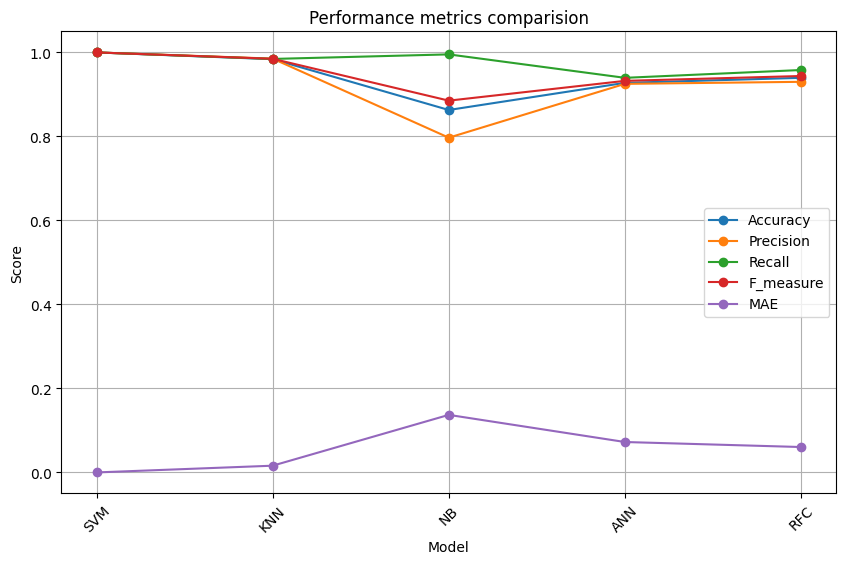

In [59]:
import matplotlib.pyplot as plt

model_names =["SVM" , "KNN" , "NB" , "ANN" , "RFC"]
accuracy_scores =[accuracy_SVM,accuracy_knn,accuracy_nb,accuracy_ann,accuracy_rf]
precision_scores=[precision_SVM,precision_knn,precision_nb,precision_ann,precision_rf]
Recall_scores = [recall_SVM,recall_knn,recall_nb,recall_ann,recall_rf]
F_measure_scores =[f1_SVM,f1_knn,f1_nb,f1_ann,f1_rf]
Mae_scores = [mae_SVM,mae_knn,mae_nb,mae_ann,mae_rf]

model_metrics = {

    "Model":model_names,
    "Accuracy":accuracy_scores,
    "precision":precision_scores,
    "Recall":Recall_scores,
    "F_measure":F_measure_scores,
    "Mean Absolute Error":Mae_scores
}

df = pd.DataFrame(model_metrics)
plt.figure(figsize = (10,6))

plt.plot(df["Model"] , df["Accuracy"], marker = 'o' , label = "Accuracy")
plt.plot(df["Model"],df["precision"],marker = 'o',label = "Precision")

plt.plot(df["Model"],df["Recall"],marker = 'o',label = "Recall")
plt.plot(df["Model"],df["F_measure"],marker = 'o',label = "F_measure")
plt.plot(df["Model"],df["Mean Absolute Error"],marker = 'o',label = "MAE")


plt.title("Performance metrics comparision")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()




